<h1 style="font-family: 'Arial', Times, serif;">CourseWork1_Q2</h1>

In [16]:
import numpy as np
import pandas as pd
import time
import heapq
import matplotlib.pyplot as plt
from scipy import stats

<h1 style="font-family: 'Arial', Times, serif;">The Probability of Lifetime</h1>

In [17]:
Prob_table_LifeTime = pd.DataFrame({
    'Prob': [0.1, 0.13, 0.25, 0.13, 0.09, 0.12, 0.02, 0.06, 0.05, 0.05],
     'LifeTime': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]})
Prob_table_LifeTime

,Prob,LifeTime
0,0.10,1000
1,0.13,1100
2,0.25,1200
3,0.13,1300
4,0.09,1400
5,0.12,1500
6,0.02,1600
7,0.06,1700
8,0.05,1800
9,0.05,1900


In [18]:
def LifeTimeGenerator():
    return np.random.choice(Prob_table_LifeTime['LifeTime'], size=1, p=Prob_table_LifeTime['Prob'].values)[0]
LifeTimeGenerator()

1400

<h1 style="font-family: 'Arial', Times, serif;">The Probability of DelayTime</h1>

In [19]:
Prob_table_DelayTime = pd.DataFrame({
    'Prob': [0.6, 0.3, 0.1],
     'DelayTime': [5, 10, 15]})
Prob_table_DelayTime

,Prob,DelayTime
0,0.6,5
1,0.3,10
2,0.1,15


In [20]:
def DelayTimeGenerator():
    return np.random.choice(Prob_table_DelayTime['DelayTime'], size=1, p=Prob_table_DelayTime['Prob'].values)[0]
DelayTimeGenerator()

5

<h1 style="font-family: 'Arial', Times, serif;">Defining the Variables</h1>

In [24]:
T = 30000
Tnow = 0
Mb = 0 # Number of bearing 
TTC = 0 # Total cost of deactivating
TBC = 0 # The cost of buying bearing
TW = 0 # The total wage of the worker
Rt = 0 # Repairing time
Dt = 0 # Deactivating time
counter_1, counter_2, counter_3 = 0, 0, 0
FEL = np.array([LifeTimeGenerator(),LifeTimeGenerator(),LifeTimeGenerator()])
FEL

array([1400, 1700, 1300], dtype=int64)

<h1 style="font-family: 'Arial', Times, serif;">Starting The Simulation</h1>

###### Part One - Repairing Method

In [21]:
start_time = time.time()
while True:
    if Tnow>T:
        Rt = Mb * 20 - (counter_2 * 10 + counter_3 * 20)
        TTC = (Dt + Rt) * 5
        TBC = Mb * 16
        TW = Rt * 15 / 3
        break
        
    elif len(set(FEL)) == 1:
        print(FEL)
        counter_3 += 1
        Mb += 3
        Tnow = min(FEL)
        for i in np.where(FEL == min(FEL))[0]:
            FEL[i] = LifeTimeGenerator() + Tnow
#         print(FEL)
        
    elif len(FEL[FEL == min(FEL)]) == 2:
#         print(FEL)
        counter_2 += 1
        Mb += 2
        Tnow = min(FEL)
        for i in np.where(FEL == min(FEL))[0]:
            FEL[i] = LifeTimeGenerator() + Tnow
    else: # Repairing the bearings
        counter_1 += 1
        Mb += 1 
        Tnow = min(FEL)
        Dt += DelayTimeGenerator()
        i = np.where(FEL == min(FEL))[0][0] # Update the FEL
        FEL[i] = LifeTimeGenerator() + Tnow

end_time = time.time()
print(f'The simulation took {end_time-start_time} seconds')
print('--------------------------------------------------')
print(f'In The Simulation All Three of Bearings Repaired {counter_3} Times Together')
print(f'In The Simulation Two of Bearings Repaired {counter_2} Times Together')
print(f'In The Simulation One Bearing Repaired {counter_1} Times')
print('--------------------------------------------------')
print(f'The Repairing Time is {Rt} Minutes')
print(f'The Deactivating Time is {Dt} Minutes')
print(f'The Cost of The Machine Being Deactivated is {TTC}$')
print(f'The cost of buying bearings is {TBC}$')
print(f'The total wage of the worker is {TW}$')
print('--------------------------------------------------')
print(f'The Total Cost is {TBC+TW+TTC}$')

The simulation took 0.0005123615264892578 seconds
--------------------------------------------------
In The Simulation All Three of Bearings Repaired 0 Times Together
In The Simulation Two of Bearings Repaired 5 Times Together
In The Simulation One Bearing Repaired 57 Times
--------------------------------------------------
The Repairing Time is 1290 Minutes
The Deactivating Time is 450 Minutes
The Cost of The Machine Being Deactivated is 8700$
The cost of buying bearings is 1072$
The total wage of the worker is 6450.0$
--------------------------------------------------
The Total Cost is 16222.0$


In [22]:
FEL

array([31200, 31500, 30500], dtype=int64)

###### Part Two - Maintenance

In [25]:
start_time = time.time()
while True:
    if Tnow>T:
        TTC = (Dt + Rt) * 5
        TBC = Mb * 16
        TW = Rt * 15 / 3
        break
        
    else: # Repairing the bearings
        Mb += 3
        Rt += 40
        Tnow = min(FEL)
        Dt += DelayTimeGenerator()
        FEL = np.array([LifeTimeGenerator() + Tnow,
                        LifeTimeGenerator() + Tnow,
                        LifeTimeGenerator() + Tnow])
        
end_time = time.time()
print(f'The simulation took {end_time-start_time} seconds')
print('--------------------------------------------------')
print(f'The Repairing Time is {Rt} Minutes')
print(f'The Deactivating Time is {Dt} Minutes')
print(f'The Cost of The Machine Being Deactivated is {TTC}$')
print(f'The cost of buying bearings is {TBC}$')
print(f'The total wage of the worker is {TW}$')
print('--------------------------------------------------')
print(f'The Total Cost is {TBC+TW+TTC}$')

The simulation took 0.010741472244262695 seconds
--------------------------------------------------
The Repairing Time is 1040 Minutes
The Deactivating Time is 220 Minutes
The Cost of The Machine Being Deactivated is 6300$
The cost of buying bearings is 1248$
The total wage of the worker is 5200.0$
--------------------------------------------------
The Total Cost is 12748.0$


In [364]:
FEL

array([31500, 31600, 31500], dtype=int64)

<h1 style="font-family: 'Arial', Times, serif;">Simulation Thousand Times</h1>

###### Part One - Repairing Method 

In [26]:
lst_1 = []
start_time = time.time()
for i in range(1000):
    T = 30000
    Tnow = 0
    Mb = 0 # Number of bearing 
    TTC = 0 # Total cost of deactivating
    TBC = 0 # The cost of buying bearing
    TW = 0 # The total wage of the worker
    Rt = 0 # Repairing time
    Dt = 0 # Deactivating time
    counter_1, counter_2, counter_3 = 0, 0, 0
    FEL = np.array([LifeTimeGenerator(),LifeTimeGenerator(),LifeTimeGenerator()])
    while True:
        if Tnow>T:
            Rt = Mb * 20 - (counter_2 * 10 + counter_3 * 20)
            TTC = (Dt + Rt) * 5
            TBC = Mb * 16
            TW = Rt * 15 / 3
            Total_cost = TBC+TW+TTC
            lst_1.append(Total_cost)
            break

        elif len(set(FEL)) == 1:
            counter_3 += 1
            Mb += 3
            Tnow = min(FEL)
            for i in np.where(FEL == min(FEL))[0]:
                FEL[i] = LifeTimeGenerator() + Tnow

        elif len(FEL[FEL == min(FEL)]) == 2:
            counter_2 += 1
            Mb += 2
            Tnow = min(FEL)
            for i in np.where(FEL == min(FEL))[0]:
                FEL[i] = LifeTimeGenerator() + Tnow

        else:
            counter_1 += 1
            Mb += 1 
            Tnow = min(FEL)
            Dt += DelayTimeGenerator()
            i = np.where(FEL == min(FEL))[0][0] # Update the FEL
            FEL[i] = LifeTimeGenerator() + Tnow
end_time = time.time()
print(f'The simulation took {end_time-start_time} seconds')

The simulation took 8.881569623947144 seconds


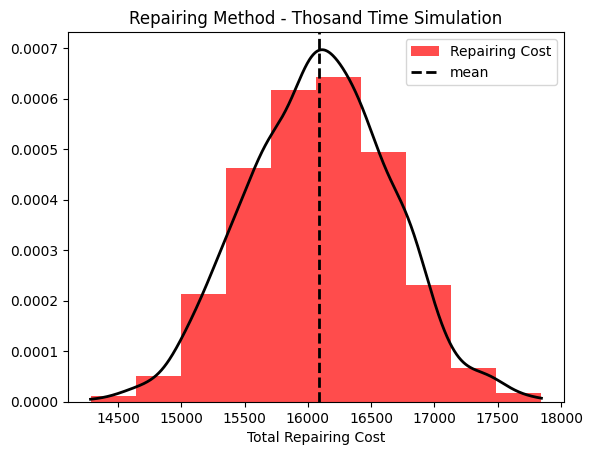

In [13]:
plt.title('Repairing Method - Thosand Time Simulation')
density = stats.gaussian_kde(lst_1)
xt = np.linspace(min(lst_1), max(lst_1), 1000)
yt = density(xt)
plt.plot(xt, yt, color = 'black', linewidth=2)
plt.hist(lst_1, density=True, color = 'red', alpha = 0.7, label = 'Repairing Cost')
plt.xlabel('Total Repairing Cost')
plt.axvline(sum(lst_1)/len(lst_1), color = 'black', linewidth=2, linestyle='--', label = 'mean')
plt.legend()
plt.show()

###### Part Two - Repairing Method 

In [367]:
lst_2 = []
for i in range(1000):
    T = 30000
    Tnow = 0
    Mb = 0 # Number of bearing 
    TTC = 0 # Total cost of deactivating
    TBC = 0 # The cost of buying bearing
    TW = 0 # The total wage of the worker
    Rt = 0 # Repairing time
    Dt = 0 # Deactivating time
    FEL = np.array([LifeTimeGenerator(),LifeTimeGenerator(),LifeTimeGenerator()])
    while True:
        if Tnow>T:
            TTC = (Dt + Rt) * 5
            TBC = Mb * 16
            TW = Rt * 15 / 3
            Total_cost = TBC+TW+TTC
            lst_2.append(Total_cost)
            break

        else: # Repairing the bearings
            Mb += 3
            Rt += 40
            Tnow = min(FEL)
            Dt += DelayTimeGenerator()
            FEL = np.array([LifeTimeGenerator() + Tnow,
                            LifeTimeGenerator() + Tnow,
                            LifeTimeGenerator() + Tnow])

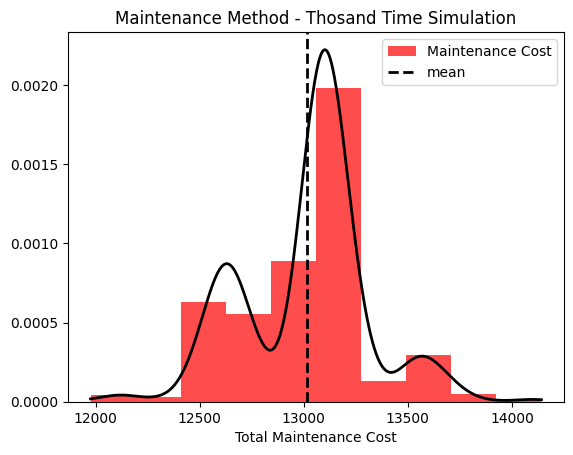

In [370]:
plt.title('Maintenance Method - Thosand Time Simulation')
density = stats.gaussian_kde(lst_2)
xt = np.linspace(min(lst_2), max(lst_2), 1000)
yt = density(xt)
plt.plot(xt, yt, color = 'black', linewidth=2)
plt.hist(lst_2, density=True, color = 'red', alpha = 0.7, label = 'Maintenance Cost')
plt.xlabel('Total Maintenance Cost')
plt.axvline(sum(lst_2)/len(lst_2), color = 'black', linewidth=2, linestyle='--', label = 'mean')
plt.legend()
plt.show()

<h1 style="font-family: 'Arial', Times, serif;">End of Code</h1>